## Directed graph symmetrization

Fitch, K. (2018). Metric preserving directed graph symmetrization, 1–16. Retrieved from http://arxiv.org/abs/1802.09829

Strongly connected, positively weighted graph.

In [1]:
%run imports.py

In [2]:
g = nx.DiGraph()
g.add_edge(1,0)
g.add_edge(2,0)

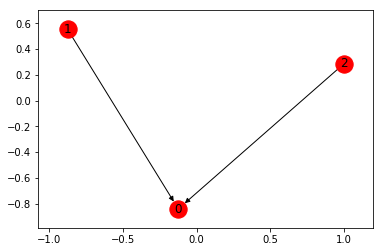

In [3]:
nx.draw_networkx(g)

Compute the Laplacian for the graph.

In [4]:
N = nx.number_of_nodes(g)
L = out_degree_laplacian(g)
np.linalg.matrix_rank(L)

2

In [5]:
L

matrix([[ 1, -1,  0],
        [ 0,  0,  0],
        [ 0, -1,  1]], dtype=int64)

Orthonormal basis 
$Q \in \mathbb{R}^{(N-1)\times N}$

$Q$ is the orthonormal basis of the nullspace of $\mathbf{1}_N$, i.e., $\mathcal{N}(\mathbf{1}_N)$

def orth_matrix(A):
    u, s, vh = np.linalg.svd(A, full_matrices=True)
    M, N = u.shape[0], vh.shape[1]
    rcond = np.finfo(s.dtype).eps * max(M, N)
    tol = np.amax(s) * rcond
    num = np.sum(s > tol, dtype=int)
    Q = vh[0:num,:].T.conj()
    return Q

In [6]:
Q = orth_matrix(L).T

$Q\mathbf{1}_n = \mathbf{0}$

In [7]:
np.printoptions(suppress=True)
np.sum(Q, axis=1)

matrix([[1.66533454e-16],
        [2.22044605e-16]])

$QQ^T = I_{(n-1)}$

In [8]:
print(np.matmul(Q, np.transpose(Q)))

[[1.00000000e+00 1.31170422e-16]
 [1.31170422e-16 1.00000000e+00]]


Compute Reduced Laplacian

$\bar{L} = QLQ^T$

In [9]:
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))

In [10]:
rL - np.transpose(rL)

matrix([[ 0.00000000e+00, -1.78426145e-16],
        [ 1.78426145e-16,  0.00000000e+00]])

Solve the Lyapunov equation
$\bar { L } \Sigma + \Sigma \bar { L } ^ { T } = I _ { n - 1 }$

In [11]:
sigma = solve_lyapunov(rL, np.identity(N-1))

Project from $\mathbb { R } ^ { ( n - 1 ) \times ( n - 1 ) }$ to $\mathbb { R } ^ { n \times n }$ by $X = 2 Q ^ { T } \Sigma Q$

In [12]:
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))

Pseudoinverse $\hat { L } _ { u } = X ^ { + }$ gives the equivalent Laplacian

In [13]:
eqL = np.linalg.pinv(x)

In [14]:
eqL

matrix([[ 0.66666667, -0.33333333, -0.33333333],
        [-0.33333333,  0.66666667, -0.33333333],
        [-0.33333333, -0.33333333,  0.66666667]])

In [15]:
np.linalg.matrix_rank(eqL)

2

Check SVD and eigenvalues of both Laplacian matrices

In [16]:
u1, s1, v1 = np.linalg.svd(L)
s1

array([ 1.73205081,  1.        , -0.        ])

In [17]:
u2, s2, v2 = np.linalg.svd(eqL)
s2

array([1.00000000e+00, 1.00000000e+00, 6.40987562e-17])

In [18]:
np.linalg.eig(L)

(array([1., 1., 0.]), matrix([[1.        , 0.        , 0.57735027],
         [0.        , 0.        , 0.57735027],
         [0.        , 1.        , 0.57735027]]))

In [19]:
np.linalg.eig(eqL)

(array([1., 0., 1.]), matrix([[ 0.81649658, -0.57735027, -0.45066209],
         [-0.40824829, -0.57735027, -0.36431101],
         [-0.40824829, -0.57735027,  0.81497311]]))

### Comparison to the linear model

In [20]:
init = np.random.rand(N)
f1 = lambda t,x: np.asarray(-L.dot(x))[0]
res1 = solve_ivp(fun=f1, t_span=[0,20], y0=init)
f2 = lambda t,x: np.asarray(-eqL.dot(x))[0]
res2 = solve_ivp(fun=f2, t_span=[0,20], y0=init)

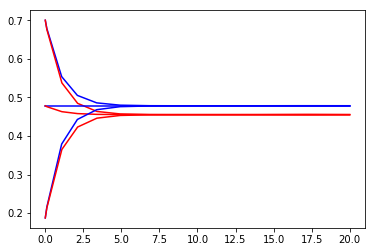

In [21]:
for i in np.arange(0,N):
    plt.plot(res1.t, res1.y[i,:], color="blue", label="")
    plt.plot(res2.t, res2.y[i,:], color="red")